In [54]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D,Flatten,Dense


In [37]:
train_data_path = "D:/Project work/Cat Dog classifier/Data/training_set/training_set"
test_data_path = "D:/Project work/Cat Dog classifier/Data/test_set/test_set"

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

##### Training data pre-processing

In [59]:
training_set = train_datagen.flow_from_directory(train_data_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


##### Test data pre-processing

In [38]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_data_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2023 images belonging to 2 classes.


In [56]:
def build_cnn():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(64,64,3)))
    model.add(MaxPool2D(pool_size=2,strides=2))

    model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
    model.add(MaxPool2D(pool_size=2,strides=2))

    model.add(Flatten())

    model.add(Dense(units=128,activation="relu"))
    model.add(Dense(units=1,activation="sigmoid"))
    
    
    return model
    

In [57]:
model = build_cnn()

In [58]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
251/251 [==============================] - 204s 812ms/step - loss: 0.6584 - accuracy: 0.6086 - val_loss: 0.6083 - val_accuracy: 0.6935
Epoch 2/25
251/251 [==============================] - 50s 199ms/step - loss: 0.5874 - accuracy: 0.6879 - val_loss: 0.5417 - val_accuracy: 0.7375
Epoch 3/25
251/251 [==============================] - 51s 205ms/step - loss: 0.5527 - accuracy: 0.7156 - val_loss: 0.5439 - val_accuracy: 0.7227
Epoch 4/25
251/251 [==============================] - 44s 176ms/step - loss: 0.5208 - accuracy: 0.7415 - val_loss: 0.5270 - val_accuracy: 0.7355
Epoch 5/25
251/251 [==============================] - 48s 191ms/step - loss: 0.5003 - accuracy: 0.7567 - val_loss: 0.5249 - val_accuracy: 0.7365
Epoch 6/25
251/251 [==============================] - 47s 187ms/step - loss: 0.4863 - accuracy: 0.7681 - val_loss: 0.4819 - val_accuracy: 0.7667
Epoch 7/25
251/251 [==============================] - 46s 182ms/step - loss: 0.4589 - accuracy: 0.7816 - val_loss: 0.4919 - val_a

In [60]:
import pickle
pickle.dump(model, open("D:/Project work/Cat Dog classifier/dog_cat_classifier.pkl", 'wb'))

TypeError: cannot pickle '_thread.RLock' object

In [85]:
import numpy as np
from keras.preprocessing import image
import pickle

test_image = image.load_img("D:\Project work\Cat Dog classifier\Data\inference\image4.jpg", target_size = (64, 64))
test_image = image.img_to_array(test_image)

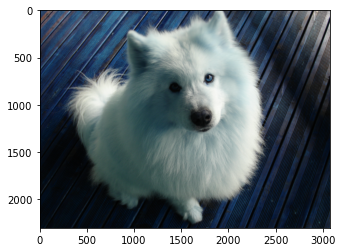

In [86]:
plt.imshow(cv2.imread("D:\Project work\Cat Dog classifier\Data\inference\image4.jpg"))

In [87]:
test_image = np.expand_dims(test_image, axis = 0)
#model = pickle.load(open("D:/Project work/Cat Dog classifier/dog_cat_classifier.pkl", 'rb'))
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    print('dog')
else:
    print('cat')

dog
